# Práctica 1 Introducción al Machine Learning. Métricas de clasificación y regresión (II).

## Importación de bibliotecas. 

Como en la primera sesión, el primer paso consiste en importar las biliotecas necesarias para realizar las tareas.  

In [1]:
# Importación de bibliotecas auxiliares

# Numpy para tratar datos
import numpy as np 

# Matplotlib para dibujar gráficas
from matplotlib import pyplot as plt

## Métricas para clasificación. Estratificación de los datos.



**Caso de clasificación: dos características y dos clases**

En primer lugar vamos a generar mediante `make_classification()` un caso de clasificación con dos características y dos clases. Es un caso más complejo que el de la primera sesión. Este ejemplo nos servirá para:

* Dibujar la frontera de decisión entre las dos clases.

* Seguir trabajando con las métricas.

* Trabajar con la generación de conjuntos de entrenamiento y test en un problema de clasificación para comprobar la capacidad de generalización de la técnica.

* Generar conjuntos de entrenamiento y de test de forma estratificada.

* Comprobar el rendimiento de dos métodos diferentes de clasificación en el mismo conjunto de datos.

* Aplicar técnicas para seleccionar el mejor modelo y el mejor conjunto de hiperaparámetros.

En la siguiente celda de código generamos los ejemplos (datos) de las dos clases.

In [2]:
# Importamos la clase necesaria
from sklearn.datasets import make_classification

# Número de ejemplos o datos totales
numero_datos = 1000

# Generamos las dos clases
# Utilizamos el parámetro random_state para que el generador aleatorio utilice una semilla 
# determinada y así que cada vez que ejecutemos la función siempre se obtengan los mismas valores 
# de x e y
# Fijamos n_informative igual a 1 para que las clases sólo se separen atendiendo a una dimensión
x, y = make_classification(
    n_samples=numero_datos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=1.2, random_state=40
)

# Características (features)
x1 = x[:,0]
x2 = x[:,1]

Dibujamos las dos clases.

Text(0, 0.5, 'Característica x2')

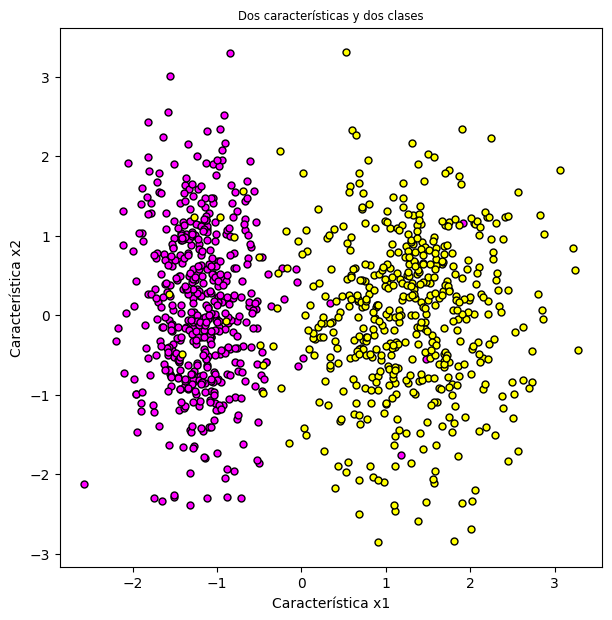

In [3]:
plt.figure(figsize=(7, 7))

# Se emplean círculos y cada clase tiene un color diferente
condicion_0 = y == 0
condicion_1 = y == 1
colores = ["magenta", "yellow"]
plt.title("Dos características y dos clases", fontsize="small")
plt.scatter(x1[condicion_0], x2[condicion_0], marker="o", c=colores[0], s=25, edgecolor="k")
plt.scatter(x1[condicion_1], x2[condicion_1], marker="o", c=colores[1], s=25, edgecolor="k")
plt.xlabel('Característica x1')
plt.ylabel('Característica x2')

**Frontera de decisión**

Al igual que en la primera sesión de métricas vamos a emplear el clasificador `SGDClassifier`. Obtendremos su función de decisión y a partir de dicha función visualizaremos la forntera de decisión. En primer lugar, entrenamos el modelo con todos los datos y obtenemos las predicciones.

In [4]:
# Importamos la clase de la técnica de clasificación de Machine Learning que vamos a emplear
from sklearn.linear_model import SGDClassifier

# Instanciamos el clasificador, no cambiamos el valor por defecto de ningún hiperparámetro
# Solamente fijamos la semilla de la inicialización del algoritmo para asegurar la reproducibilidad
clasificador_sgd = SGDClassifier(random_state=20)

# Estimación de los parámetros del modelo para el conjunto de datos
clasificador_sgd.fit(x, y)

# Predicción de los valores. y_pred son los valores de salida, las predicciones, del clasificador
# La salida del clasificador produce valores de 0 o de 1
y_pred = clasificador_sgd.predict(x)

Obtenemos la función de decisión, es un plano.

In [5]:
# Para ver el plano que genera el modelo necesitamos los coeficientes del plano
w = clasificador_sgd.coef_
b = clasificador_sgd.intercept_
print(f'Los coeficientes w con {np.round(w,4)}')
print(f'El bias o intercepto b es {np.round(b,4)}')


Los coeficientes w con [[2.5292 0.2549]]
El bias o intercepto b es [0.4039]


En la siguiente celda dibujamos la función de decisión, el plano, en 3D.

Text(0.5, 0, 'Objetivos')

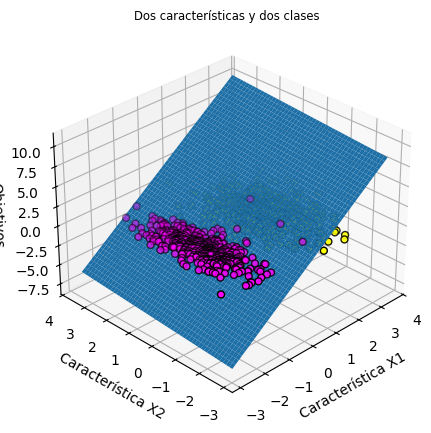

In [6]:
minX1 = min(x1)       # Valor mínimo de la 1ª característica
maxX1 = max(x1)       # Valor máximo de la 1ª característica
minX2 = min(x2)       # Valor mínimo de la 2ª característica
maxX2 = max(x2)       # Valor máximo de la 2ª característica
marginX1 = (maxX1 - minX1) * 0.05  # 5% del rango para las dos características
marginX2 = (maxX2 - minX2) * 0.05  # 5% del rango para las dos características

num_puntos_dibujar = 1000
x1_vector = np.linspace(minX1 - marginX1, maxX1 + marginX1, num_puntos_dibujar)  # Vector de coord. X
x2_vector = np.linspace(minX1 - marginX2, maxX2 + marginX2, num_puntos_dibujar)  # Vector de coord. Y
X1_rejilla, X2_rejilla = np.meshgrid(x1_vector, x2_vector)       # Generamos las rejillas de coordenadas en forma de matriz

# Función de decisión evaluada en la rejilla de características
valor_plano_modelo = w[0,0] * X1_rejilla + w[0,1] * X2_rejilla + b

# Dibujamos los datos
fig = plt.figure(figsize=(5, 5))

# Se crean los ejes
ax = fig.add_subplot(111, projection='3d')

# Dibujo de las clases
ax.scatter(x1[condicion_0], x2[condicion_0], y[condicion_0], marker="o", c=colores[0], s=25, edgecolor="k")
ax.scatter(x1[condicion_1], x2[condicion_1], y[condicion_1], marker="o", c=colores[1], s=25, edgecolor="k")

# Dibujo del plano
ax.plot_surface(X1_rejilla, X2_rejilla, valor_plano_modelo)

# Ajustamos el punto de vista
ax.view_init(elev=30, azim=225)
# Se puede ajustar a otros valores para ver el plano de otra forma y los valores de las etiquetas
#ax.view_init(elev=0, azim=90)

# Título y nombre de los ejes
ax.set_title("Dos características y dos clases", fontsize="small")
ax.set_xlabel('Característica X1')
ax.set_ylabel('Característica X2')
ax.set_zlabel('Objetivos')


La forntera de decisión es el conjunto de puntos en los que la función de decisión es igual al umbral de discriminación, es decir, igual a 0. En este caso es una recta, producida por la intersección de dos planos: el plano que forma la función de decisión y el plano con valor de z igual a 0. 

Dibujamos la frontera de decisión en una gráfica en la que se muestran las dos clases con distintos colores y en el que los ejes de coordenadas son las dos características. Además, vamos a escribir una función para reutilizar el código.

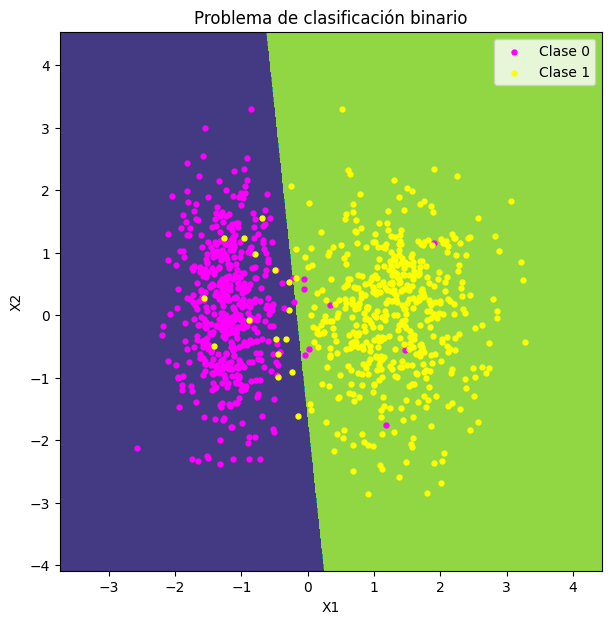

In [7]:
# Frontera de decisión: definimos una función para reutilizar el código
def dibuja_frontera_decision(Entradas, modelo, Salidas, clase_0, clase_1, 
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera):
    '''Dibuja las clases y la frontera de decisión generada por la 
    técnica de machine learning'''

    if (adicion_frontera == 1):
        minX1 = min(Entradas[:, 0])       # Valor mínimo de la 1ª característica
        maxX1 = max(Entradas[:, 0])       # Valor máximo de la 1ª característica
        minX2 = min(Entradas[:, 1])       # Valor mínimo de la 2ª característica
        maxX2 = max(Entradas[:, 1])       # Valor máximo de la 2ª característica
        marginX1 = (maxX1 - minX1) * 0.2  # 20% del rango
        marginX2 = (maxX2 - minX2) * 0.2  # para las dos características

        num_puntos_dibujar = 1000
        x1_vector = np.linspace(minX1 - marginX1, maxX1 + marginX1, num_puntos_dibujar)  # Vector de coord. X
        x2_vector = np.linspace(minX2 - marginX2, maxX2 + marginX2, num_puntos_dibujar)  # Vector de coord. Y
        X1_rejilla, X2_rejilla = np.meshgrid(x1_vector, x2_vector)       # Generamos las matrices de coordenadas

        # Concatenación con np.c_
        Z = modelo.predict(np.c_[X1_rejilla.ravel(), X2_rejilla.ravel()]).reshape(X1_rejilla.shape)

        
        plt.contourf(X1_rejilla, X2_rejilla, Z,levels = 2)

    condicion = Salidas == clase_0
    entradas_clase_0 = Entradas[condicion]
    x1 = entradas_clase_0[:,0]
    y1 = entradas_clase_0[:,1]
    color_cero = colores[0] 
    plt.scatter(x1, y1, marker=simbolo, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)

    condicion = Salidas == clase_1
    entradas_clase_1 = Entradas[condicion]
    x1 = entradas_clase_1[:,0]
    y1 = entradas_clase_1[:,1]
    color_uno = colores[1]
    plt.scatter(x1, y1, marker=simbolo, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

# Figura
fig = plt.figure(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0
clase_1 = 1
colores = ["magenta", "yellow"]
etiqueta_leyenda_cero = 'Clase 0'
etiqueta_leyenda_uno = 'Clase 1'
titulo = "Problema de clasificación binario"
titulo_eje_x = "X1"
titulo_eje_y = "X2"
simbolo = '.'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x, clasificador_sgd, y, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)



**La curva de precisión y sensibilidad**

En la primera sesión se explicó la importancia del umbral de discriminación. Los valores de precisión y sensibilidad dependen del umbral de discriminación de modo que existe una relación de compromiso entre la mejora en la precisión y la mejora en la sensibilidad. Si se mejora la sensibilidad, se empeora la sensibilidad y viceversa. 

Vamos a ver este efecto gracias a la curva de precisión y sensibilidad. En esta curva se muestran sobre el eje x distintos valores de umbral. En el eje y se muestran los valores de precisión y sensibilidad para cada uno de los umbrales. 

La función `precision_recall_curve()` permite obtener los umbrales, los valores de precisión y los valores de sensibilidad necesarios para la curva de precisión y sensibilidad. Para ello necesita:
 * Los valores de 0 o 1 verdaderos.
 * Los valores reales ($R$) de salida  del clasificador (no los valores de 0 o 1). Como se indicó en la primera sesión a estos valores se les puede llamar "puntuaciones" ("score").

In [8]:
# Importamos la función precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Los valores reales generados por el clasificador, los llamamos puntuaciones
# En este clasificador se pueden obtener con los coeficientes del plano o con el método decision_function
#y_puntuaciones = w[0,0] * x1 + w[0,1] * x2 + b 
y_puntuaciones = clasificador_sgd.decision_function(x)

# Los argumentos de entrada de precision_recall_curve son:
    # los valores de las etiquetas ( y vale 0 y 1) y
    # los valores reales de la salida de la técnica de machine learning (y_puntuaciones)
precisiones, sensibilidades, umbrales = precision_recall_curve(y, y_puntuaciones)

Ahora vamos a dibujar la curva con los valores obtenidos anteriormente. Escribiremos una función para reutilizar el código.

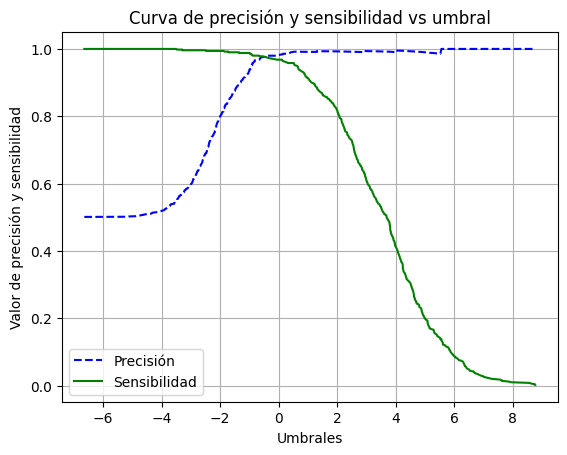

In [9]:
# Función que dibuja la curva de precisión-sensibilidad
def dibujar_precision_sensibilidad_vs_umbral(precisiones, sensibilidades, umbrales):
    plt.plot(umbrales, precisiones[:-1], "b--", label="Precisión")
    plt.plot(umbrales, sensibilidades[:-1], "g-", label="Sensibilidad")

    plt.title('Curva de precisión y sensibilidad vs umbral')
    plt.xlabel('Umbrales')
    plt.ylabel('Valor de precisión y sensibilidad')
    plt.legend()
    plt.grid()

# Dibujamos la curva particular de nuestro ejemplo
dibujar_precision_sensibilidad_vs_umbral(precisiones, sensibilidades, umbrales)

**Curva "Receiver Operating Characteristic" (ROC) y valor de Área bajo la Curva o "Area under Curve" (AUC)**

La curva ROC representa la sensibilidad respecto a la probabilidad de falsa alarma en un clasificador binario cuando se varía el umbral de discriminación. 

* A la sensibilidad también se le llama ratio de verdaderos positivos (TPR) o PD. 

* La probabilidad de falsa alarma es la ratio de falsos negativos, es decir, es igual a 1 menos la especificidad (tasa de verdaderos negativos). 

El AUC es el área bajo la curva ROC.

La función `roc_curve()` permite obtener los valores necesarios para construir la curva ROC. La función `roc_auc_score()` calcula el valor de AUC.  A continuación se representa la curva ROC y se obtiene el valor de AUC. Los argumentos de estas dos funciones son los mismos que los de `precision_recall_curve()`.

In [10]:
# Importamos las funciones requeridas
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Valores para construir la curva ROC. Los argumentos de entrada de roc_curve son los 
# mismos que en precision_recall_curve
prob_falsa_alarma, ratio_verdaderos_positivos, umbrales = roc_curve(y, y_puntuaciones)

A continuación, dibujamos la curva ROC y obtenemos el valor de AUC.

El área bajo la curva es (AUC):
0.9906


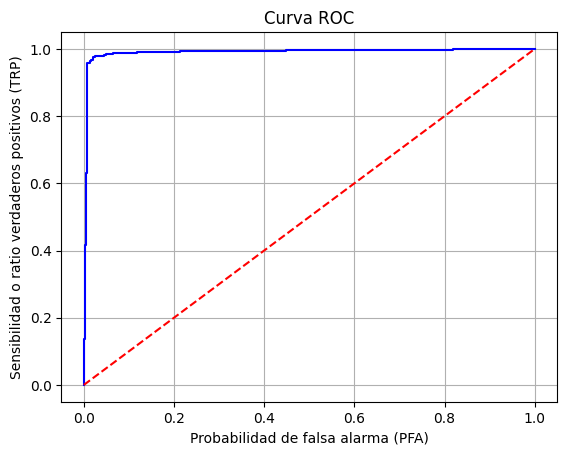

In [11]:
def dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos):
    plt.plot(prob_falsa_alarma, ratio_verdaderos_positivos, "b-", )
    plt.plot([0, 1], [0, 1], 'r--') # Diagonal

    plt.title('Curva ROC')
    plt.xlabel('Probabilidad de falsa alarma (PFA)')
    plt.ylabel('Sensibilidad o ratio verdaderos positivos (TRP)')
    plt.grid()

dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos)

AUC = roc_auc_score(y, y_puntuaciones)
decimales = 4
print('El área bajo la curva es (AUC):')
print(round(AUC,decimales))

**Generación de los conjuntos de entrenamiento y test**

Hasta el momento hemos generado (entrenado) el clasificador con todos los datos disponibles. Ahora bien, como se ha visto en clase de teoría cuando se dispone de un conjunto de datos, hay que dividir dicho conjunto en dos conjuntos a ser posible disjuntos: el conjunto de entrenamiento y un conjunto de test. 

**El conjunto de entrenamiento sirve para calcular los parámetros del modelo y el conjunto de test para comprobar su capacidad de generalización**.  

La selección de los datos de los conjuntos de entrenamiento y de test se realiza de forma aleatoria, por ejemplo, empleando `train_test_split()`. Si el número de muestras no es elevado (especialmente respecto al número de características) una selección aleatoria puede producir conjuntos de entrenamiento y test que posean una distribución  diferente o no similar a la del conjunto de datos total.

Vamos a ver este problema en el conjunto de entrenamiento. Para ello reduciremos el número de ejemplos totales a 100 y mediante la función `hist()`construiremos el histograma de los datos totales y del conjunto de entrenamiento. El histograma calcula cuántos datos pertenecen a cada uno de los intervalos (*bins*) en los que se divide el rango total de los datos. Por ello, el histograma es una aproximación de la distribución de los datos.

En la siguiente celda se generan los conjuntos de entrenamiento y de test de forma aleatoria, sin aplicar la estratificación. El argumento `random_state`se fija para obtener los mismos resultados.

In [12]:
# Importación del método train_test_split para separar el conjunto total de datos
# en un conjunto de entrenamiento y de test
from sklearn.model_selection import train_test_split

# Número de datos totales
numero_datos = 100

# Generamos las dos clases
# Utilizamos el parámetro random_state para que el generador aleatorio utilice una semilla 
# determinada y así que cada vez que ejecutemos la función siempre se obtengan los mismas valores 
# de x e y
x, y = make_classification(
    n_samples=numero_datos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=1.2, random_state=40
)

# Conjuntos de entrenamiento y test
# Habitualmente se selecciona un 80% de los datos para entrenamiento y un 20% para test
# Fijamos el parámetro random_state para reproducibilidad
porcentaje_test = 0.2
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=porcentaje_test, random_state=10)

En la siguiente celda de código se aplica el histograma para ver la distribución de los datos totales y de un conjunto de entrenamiento. Como se aprecia en los datos y figuras, la distribución del conjunto de entrenamiento presenta diferencias respecto a la del conjunto total.

Los datos y figura de la característica: 1
-----Conjunto de datos total-----
Número de datos de cada intervalo
[ 3  9 15 23 23 17  4  5  0  1]
Frecuencia de los datos de cada intervalo
[0.03 0.09 0.15 0.23 0.23 0.17 0.04 0.05 0.   0.01]
-----Conjunto de datos de entrenamiento-----
Número de datos de cada intervalo
[ 2  5  5 11 11 14 11 12  1  8]
Frecuencia de los datos de cada intervalo
[0.025  0.0625 0.0625 0.1375 0.1375 0.175  0.1375 0.15   0.0125 0.1   ]


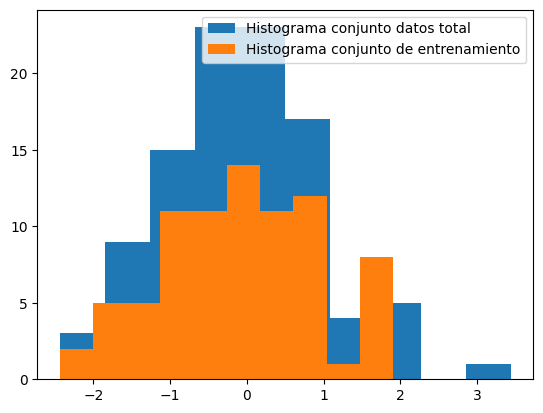

Los datos y figura de la característica: 2
-----Conjunto de datos total-----
Número de datos de cada intervalo
[ 6 16 21 12 13 12  7  7  5  1]
Frecuencia de los datos de cada intervalo
[0.06 0.16 0.21 0.12 0.13 0.12 0.07 0.07 0.05 0.01]
-----Conjunto de datos de entrenamiento-----
Número de datos de cada intervalo
[ 6 11 17  8 10 12  5  6  4  1]
Frecuencia de los datos de cada intervalo
[0.075  0.1375 0.2125 0.1    0.125  0.15   0.0625 0.075  0.05   0.0125]


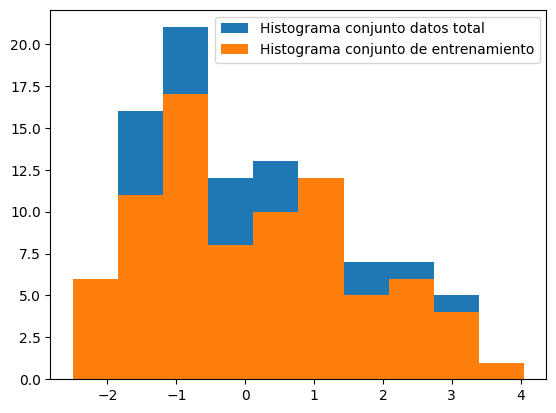

In [13]:
# Número de intervalos
bins=10

for indice in [0,1]:
    print(f'Los datos y figura de la característica: {indice+1}')

    print('-----Conjunto de datos total-----')
    # Histograma del conjunto total
    hist = np.histogram(x[:,indice],bins)
    numero_datos_bins = hist[0]
    
    # Número de datos en cada intervalo
    print('Número de datos de cada intervalo')
    print(numero_datos_bins)
    # Frecuencia de los datos en cada intervalo
    print('Frecuencia de los datos de cada intervalo')
    print(numero_datos_bins/len(x))

    print('-----Conjunto de datos de entrenamiento-----')
    # Histograma del conjunto de entrenamiento
    hist = np.histogram(x_ent[:,indice],bins)
    numero_datos_bins = hist[0]
    
    # Número de datos en cada intervalo
    print('Número de datos de cada intervalo')
    print(numero_datos_bins)
    # Frecuencia de los datos en cada intervalo
    print('Frecuencia de los datos de cada intervalo')
    print(numero_datos_bins/len(x_ent))

    # Dibujamos el histograma de la característica
    plt.hist(x[:,indice], bins=bins, label='Histograma conjunto datos total')
    plt.hist(x_ent[:,indice], bins=bins, label='Histograma conjunto de entrenamiento')
    plt.legend()
    plt.show()


**Muestreo estratificado**

*Scikit-learn* dispone de la clase `StratifiedShuffleSplit()` para realizar un muestreo que respete las distribuciones de los datos en mayor medida que el muestreo aleatorio. Esta clase genera los índices del muestreo estratificado.

En la siguiente celda de código se muestra cómo aplicar esta clase para obtener el muestreo en el conjunto de entrenamiento y de test, aunque sólo vamos a ver los resultados en el conjunto de entrenamiento. 

In [14]:
# Importamos la clase para realizar el muestreo estratificado
from sklearn.model_selection import StratifiedShuffleSplit

# Instanciamos la clase: el tamaño del conjunto de entrenamiento es el mismo que en
# el caso de muestreo aleatorio. 
# Fijamos el porcentaje del conjunto de test al mismo valor que el caso sin estratificar
dividir_forma_estratificada = StratifiedShuffleSplit(test_size=porcentaje_test, random_state=42)

# Mediante este bucle
for train_index, test_index in dividir_forma_estratificada.split(x, y):
    x_ent_estratificada, x_test_estratificada = x[train_index], x[test_index]
    y_ent_estratificada, y_test_estratificada = y[train_index], y[test_index]

Ahora se utiliza el histograma para obtener la frecuencia y se obtiene la figura del histograma de los datos de entrenamiento en las dos caracteríticas.

Los datos y figura de la característica: 1
-----Conjunto de datos total-----
Número de datos de cada intervalo
[ 3  9 15 23 23 17  4  5  0  1]
Frecuencia de los datos de cada intervalo
[0.03 0.09 0.15 0.23 0.23 0.17 0.04 0.05 0.   0.01]
-----Conjunto de datos de entrenamiento-----
Número de datos de cada intervalo
[ 3  7 13 17 19 13  3  4  0  1]
Frecuencia de los datos de cada intervalo
[0.0375 0.0875 0.1625 0.2125 0.2375 0.1625 0.0375 0.05   0.     0.0125]


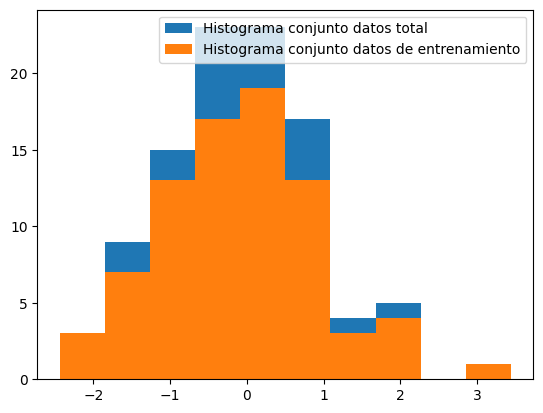

Los datos y figura de la característica: 2
-----Conjunto de datos total-----
Número de datos de cada intervalo
[ 6 16 21 12 13 12  7  7  5  1]
Frecuencia de los datos de cada intervalo
[0.06 0.16 0.21 0.12 0.13 0.12 0.07 0.07 0.05 0.01]
-----Conjunto de datos de entrenamiento-----
Número de datos de cada intervalo
[ 4 13 17 10 10 10  6  4  5  1]
Frecuencia de los datos de cada intervalo
[0.05   0.1625 0.2125 0.125  0.125  0.125  0.075  0.05   0.0625 0.0125]


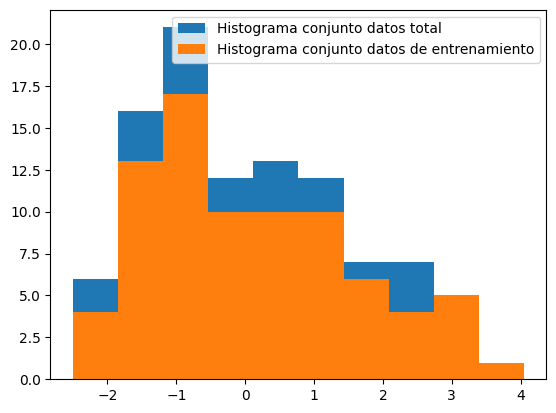

In [15]:
# Número de intervalos
bins=10

for indice in [0,1]:
    print(f'Los datos y figura de la característica: {indice+1}')

    print('-----Conjunto de datos total-----')
    # Histograma del conjunto total
    hist = np.histogram(x[:,indice],bins)
    numero_datos_bins = hist[0]
    
    # Número de datos en cada intervalo
    print('Número de datos de cada intervalo')
    print(numero_datos_bins)
    # Frecuencia de los datos en cada intervalo
    print('Frecuencia de los datos de cada intervalo')
    print(numero_datos_bins/len(x))

    print('-----Conjunto de datos de entrenamiento-----')
    # Histograma del conjunto de entrenamiento
    hist = np.histogram(x_ent_estratificada[:,indice],bins)
    numero_datos_bins = hist[0]
    
    # Número de datos en cada intervalo
    print('Número de datos de cada intervalo')
    print(numero_datos_bins)
    # Frecuencia de los datos en cada intervalo
    print('Frecuencia de los datos de cada intervalo')
    print(numero_datos_bins/len(x_ent_estratificada))

    # Dibujamos el histograma de la característica
    plt.hist(x[:,indice], bins=bins, label='Histograma conjunto datos total')
    plt.hist(x_ent_estratificada[:,indice], bins=bins, label='Histograma conjunto datos de entrenamiento')
    plt.legend()
    plt.show()

**Ejercicio 1: comprobación distribución de datos de entrenamiento y de test**

Obtenga la gráfica del histograma para un número de intervalos igual a 10 para el conjunto de entrenamiento y de test cuando se emplea la función `train_test_split()`. Utilice los ejemplos de (x,y) inciales, los que poseían 1000 muestras. En la función `train_test_split()` fije el valor de random_state igual a 90. ¿Sería necesario emplear un muestreo estratificado?

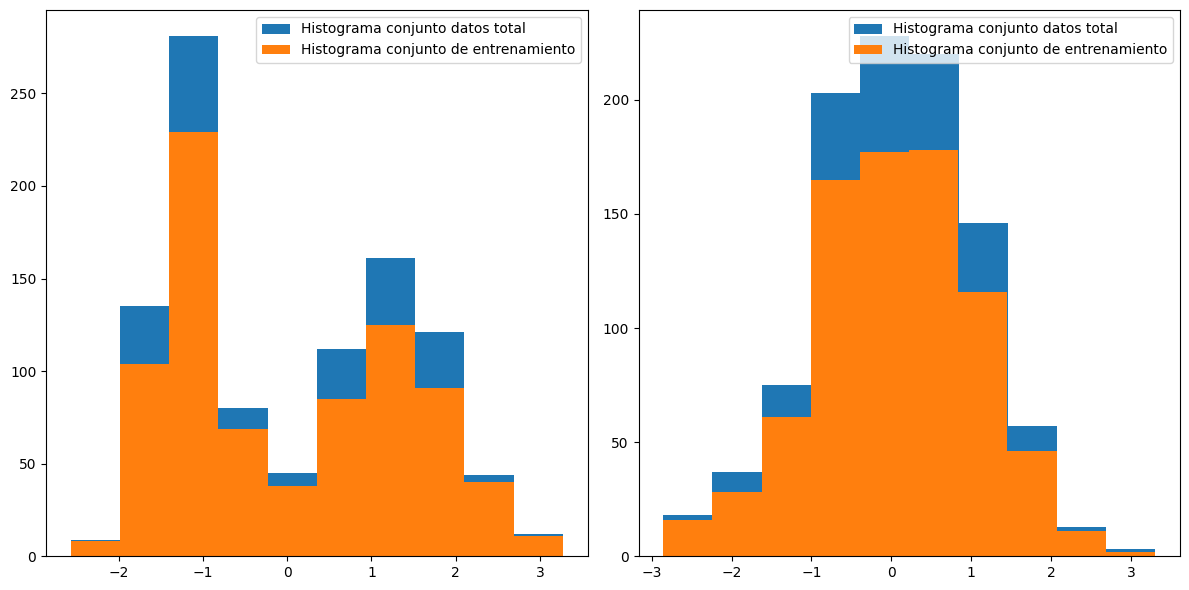

In [30]:
x, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=1.2, random_state=40
)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_ent, x_test, y_ent, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

# Número de intervalos
bins=10

plt.figure(figsize=(12, 6))
for indice in [0, 1]:
    plt.subplot(1, 2, indice + 1)
    plt.hist(x[:, indice], bins=bins, label='Histograma conjunto datos total')
    plt.hist(x_ent[:, indice], bins=bins, label='Histograma conjunto de entrenamiento')
    plt.legend()
plt.tight_layout()
plt.show()

**Entrenamiento y validación del clasificador**

Vamos a emplear el conjunto de entrenamiento para entrenar (generar) el clasificador. En los siguientes ejercicios se pedirá medir el rendimiento del clasificador en el conjunto de entrenamiento y especialmente en el conjunto de test, que permite analizar la capacidad de generalización.

En la siguiente celda de código se entrena el clasificador. Puede emplear los conjuntos de entrenamiento y de test del ejercicio anterior.

In [31]:
# Entrenamiento: estimación de los parámetros del modelo con el conjunto de datos de entrenamiento
clasificador_sgd.fit(x_ent, y_ent)

SGDClassifier(random_state=20)

**Ejercicio 2: rendimiento del clasificador. Métricas**

En este ejercicio vamos a medir el rendimiento del clasificador mediante las métricas obtenidas a partir de la matriz de confusión. Obtenga las métricas para el conjunto de entrenamiento y para el conjunto de test. Puede dibujar los datos de entrenamiento y de test y la frontera de decisión con el código proporcionado. A la vista de los resultados, ¿el clasificador generaliza bien?


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas_clasificacion(y_true, y_pred):
    # Calcular matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calcular las métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Devolver las métricas en un diccionario
    return {
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

y_ent_pred = clasificador_sgd.predict(x_ent)
y_test_pred = clasificador_sgd.predict(x_test)

metricas_ent = calcular_metricas_clasificacion(y_ent, y_ent_pred)
metricas_test = calcular_metricas_clasificacion(y_test, y_test_pred)

print("--- Métricas del conjunto de entrenamiento ---")
for k, v in metricas_ent.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: \n{v}")

print("\n--- Métricas del conjunto de prueba ---")
for k, v in metricas_test.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: \n{v}")
    

--- Métricas del conjunto de entrenamiento ---
confusion_matrix: 
[[401   4]
 [ 17 378]]
accuracy: 0.9738
precision: 0.9895
recall: 0.9570
f1_score: 0.9730

--- Métricas del conjunto de prueba ---
confusion_matrix: 
[[ 93   1]
 [  3 103]]
accuracy: 0.9800
precision: 0.9904
recall: 0.9717
f1_score: 0.9810


**Ejercicio 3: rendimiento del clasificador. Curva ROC y AUC**

En este ejercicio vamos a medir el rendimiento del clasificador mediante la curva ROC y el valor de AUC. Obtenga la cruva ROC y el valor de AUC para el conjunto de entrenamiento y para el conjunto de test.

## Métricas de regresión. 



**Generación de datos**

Al igual que en clasificación vamos a generar datos de forma sintética. En la siguiente celda se generan los datos.

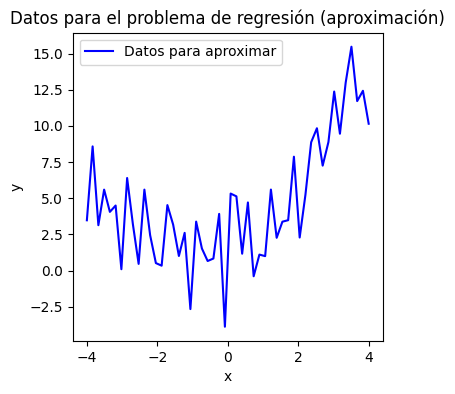

In [81]:
# Fijamos la semilla del generados de números aleatorios de numpy 
# para que obtener siempre los mismos resultados
semilla =30
np.random.seed(semilla)

# Para obtener los datos escribimos una función

def obtencion_datos(ini_x, fin_x, num_puntos, constante_ruido):
    # Característica: números equiespaciados entre ini_x y fin_x
    
    x =np.linspace(ini_x, fin_x, num_puntos)
    x = x.reshape(-1,1)


    # Ruido aleatorio según una distribución normal (gaussiana)
    ruido = constante_ruido * np.random.randn(num_puntos, 1)

    # Objetivo: función no lineal con respecto a x
    y_limpia = 0.5*x ** 2 + x + 2
    y = y_limpia + ruido

    return x,y

# Función para generar datos para el problema de regresión
ini_x = -4 
fin_x = 4 
num_puntos = 50
constante_ruido = 2
x, y = obtencion_datos(ini_x, fin_x, num_puntos, constante_ruido)

# Dibujamos la gráfica con los datos
plt.figure(figsize=(4, 4))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Generación de los conjuntos de entrenamiento y test**

Al igual que en el problema de clasificación vamos a emplear la función `train_test_split()` para generar los conjuntos de entrenamiento y de test de forma aleatoria. Fijaremos el valor de `random_state`.

In [82]:
# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2, random_state=10)

**Regresor lineal: polinomio de grado 1**

Vamos a emplear un regresor o aproximador de tipo lineal para aproximar los datos generados. Entrenaremos el modelo con el conjunto de entrenamiento y comprobaremos la capacidad de generalización con el conjunto de test.

In [83]:
# Importamos la clase para aplicar un ajuste lineal a los datos
from sklearn.linear_model import LinearRegression

# Instanciamos el regresor o aproximador: modelo lineal
aproximador_lineal = LinearRegression()

# Estimación de los parámetros del modelo regresor
aproximador_lineal.fit(x_ent, y_ent)

LinearRegression()

**Regresor lineal de tipo polinomial (grado superior a 1): utilización de `Pipeline()`**

Para generar un polinomio con *Scikit-learn* se deben realizar dos operaciones: elevar a la potencia deseada los datos y aplicar un regresor lineal. La aplicación de varias operaciones se puede realizar en un mismo proceso mediante la clase `Pipeline()`. A continuación creamos un "canal de operaciones" o "pipeline" para generar un polinomio de grado 5 con el conjunto de entrenamiento.

In [84]:
# Importamos la clase para generar el polinomio
from sklearn.preprocessing import PolynomialFeatures

# Importamos la clase Pipeline 
from sklearn.pipeline import Pipeline

# Instanciamos la clase que eleva a la potencia deseada
poly = PolynomialFeatures(degree=5)

# Instanciamos el aproximador lineal
aproximador_lineal_para_polinomio = LinearRegression()

# Generamos el pipeline: aplicará los procedimientos en el orden que indiquemos
# Como nombre de las operaciones se puede emplear el que se desee: 'elevar_a_potencias' y 'regresor_lineal' por ejemplo
pipeline = Pipeline([('elevar_a_potencias', poly), ('regresor_lineal', aproximador_lineal_para_polinomio)])

# Estimación de los parámetros del modelo regresor
pipeline.fit(x_ent, y_ent)

Pipeline(steps=[('elevar_a_potencias', PolynomialFeatures(degree=5)),
                ('regresor_lineal', LinearRegression())])

**Métricas de regresión**

En la primera sesión empleamos únicamente la métrica del error cuadrático medio (MSE). En esta sesión vamos a emplear las otras dos vistas en teoría: el error absoluto medio y el coeficiente de determinación R cuadrado. Sus ecuaciones son:

Error cuadrátrico medio (MSE):

$$
\begin{equation*}
    MSE({\bf w})=\frac{1}{N} \sum_{n=1}^N \{ y(x_n, {\bf w})- t_n \}^2 
\end{equation*}
$$

Error absoluto medio (MAE):

$$
\begin{equation*}
    MAE({\bf w})=\frac{1}{N} \sum_{n=1}^N | y(x_n, {\bf w})- t_n |
\end{equation*}
$$

Coeficiente de determinación R2

$$
\begin{equation*}
    R^2=1-\frac{\sum_{i} {(y_i-t_i)^2}}{\sum_{i} {(t_i-\mu_t)^2}}
\end{equation*}
$$

En las siguientes celdas de código se importan las funciones correspondientes a las métricas anteriores y se aplican en la aproximación que realiza el regresor lineal y el polinómico.

Métricas de error del regresor lineal en el conjunto de entrenamiento.

In [85]:
# Valores de salida del regreso lineal para el conjunto de entrenamiento
y_sal_lineal_ent = aproximador_lineal.predict(x_ent)

# Valores de salida del regreso lineal para el conjunto de test
y_sal_lineal_test = aproximador_lineal.predict(x_test)

In [86]:
# Importamos las funciones de cálculo de las principales métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Error cuadrático medio cometido por la técnica de machine learning
# Error de entrenamiento
error_MSE = mean_squared_error(y_ent, y_sal_lineal_ent)

# Variables
titulo_tipo_datos = 'del conjunto de entrenamiento en el regresor lineal '
numero_decimales = 4

mensaje = 'El error cuadrático medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MSE,numero_decimales))
                                            
# Error absoluto medio cometido por la técnica de machine learning
# Error de entrenamiento
error_MAE = mean_absolute_error(y_ent, y_sal_lineal_ent)

mensaje = 'El error absoluto medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MAE,numero_decimales))
                                            
# Coeficiente de determinación 
# En el conjunto de datos de entrenamiento
R2 = r2_score(y_ent, y_sal_lineal_ent)

mensaje = 'El valor del coeficiente de determinación R2 ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(R2,numero_decimales))

El error cuadrático medio del conjunto de entrenamiento en el regresor lineal es:
12.3048
El error absoluto medio del conjunto de entrenamiento en el regresor lineal es:
2.7899
El valor del coeficiente de determinación R2 del conjunto de entrenamiento en el regresor lineal es:
0.3146


Métricas de error del regresor lineal en el conjunto de test.

In [87]:
# Error cuadrático medio cometido por la técnica de machine learning
# Error de test
error_MSE = mean_squared_error(y_test, y_sal_lineal_test)

# Variables
titulo_tipo_datos = 'del conjunto de test en el regresor lineal '
numero_decimales = 4

mensaje = 'El error cuadrático medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MSE,numero_decimales))
                                            
# Error absoluto medio cometido por la técnica de machine learning
# Error de test
error_MAE = mean_absolute_error(y_test, y_sal_lineal_test)

mensaje = 'El error absoluto medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MAE,numero_decimales))
                                            
# Coeficiente de determinación 
# En el conjunto de datos de test
R2 = r2_score(y_test, y_sal_lineal_test)

mensaje = 'El valor del coeficiente de determinación R2 ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(R2,numero_decimales))

El error cuadrático medio del conjunto de test en el regresor lineal es:
10.6091
El error absoluto medio del conjunto de test en el regresor lineal es:
2.8558
El valor del coeficiente de determinación R2 del conjunto de test en el regresor lineal es:
0.2536


Para entender mejor los resultados vamos a mostrar en una gráfica:

* Los datos del problema: se dibujan unidos con una línea azul.
* Los datos de entrenamiento: se dibujan en verde.
* Los datos de test: se dibujan en magenta.
* Las salidas del regresor para un conjunto amplio de valores de la característica equiespaciados: se dibujan unidos con una línea negra. Es la representación de la curva que genera el modelo en el problema de aproximación.

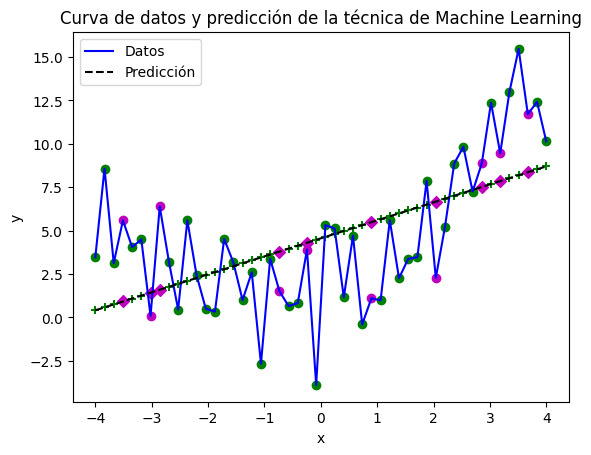

In [ ]:
# Ordenamos los valores por si estuvieran desordenados
indices = np.argsort(x[:,0], axis=0)
x = x[indices]
y = y[indices]

# Valores de la característica para ver la curva que genera el regresor
num_puntos_x = 500
x_equiespaciados = np.linspace(ini_x, fin_x, num_puntos_x)
x_equiespaciados = x_equiespaciados.reshape(-1,1)

# Valores de salida del regresor para los valores anteriores
y_sal_lineal_equiespaciados = aproximador_lineal.predict(x_equiespaciados)

plt.plot(x, y, "b-", label="Datos")
plt.plot(x_equiespaciados, y_sal_lineal_equiespaciados, "k--", label="Predicción")
plt.scatter(x_ent, y_ent, color="g", marker='o')
plt.scatter(x_test, y_test, color="m", marker='o')
plt.scatter(x_ent, y_sal_lineal_ent, color="g", marker='+')
plt.scatter(x_test, y_sal_lineal_test, color="m", marker='D')

plt.title('Curva de datos y predicción de la técnica de Machine Learning')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Métricas de error del regresor polinómico en el conjunto de entrenamiento.

In [89]:
# Valores de salida del regreso lineal para el conjunto de entrenamiento
y_sal_pol_ent = pipeline.predict(x_ent)

# Valores de salida del regreso lineal para el conjunto de test
y_sal_pol_test = pipeline.predict(x_test)

In [90]:
# Error cuadrático medio cometido por la técnica de machine learning
# Error de entrenamiento
error_MSE = mean_squared_error(y_ent, y_sal_pol_ent)

# Variables
titulo_tipo_datos = 'del conjunto de entrenamiento en el regresor lineal '
numero_decimales = 4

mensaje = 'El error cuadrático medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MSE,numero_decimales))
                                            
# Error absoluto medio cometido por la técnica de machine learning
# Error de entrenamiento
error_MAE = mean_absolute_error(y_ent, y_sal_pol_ent)

mensaje = 'El error absoluto medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MAE,numero_decimales))
                                            
# Coeficiente de determinación 
# En el conjunto de datos de entrenamiento
R2 = r2_score(y_ent, y_sal_pol_ent)

mensaje = 'El valor del coeficiente de determinación R2 ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(R2,numero_decimales))

El error cuadrático medio del conjunto de entrenamiento en el regresor lineal es:
4.7272
El error absoluto medio del conjunto de entrenamiento en el regresor lineal es:
1.7852
El valor del coeficiente de determinación R2 del conjunto de entrenamiento en el regresor lineal es:
0.7367


Métricas de error del regresor polinómico en el conjunto de test.

In [91]:
# Error cuadrático medio cometido por la técnica de machine learning
# Error de test
error_MSE = mean_squared_error(y_test, y_sal_pol_test)

# Variables
titulo_tipo_datos = 'del conjunto de test en el regresor lineal '
numero_decimales = 4

mensaje = 'El error cuadrático medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MSE,numero_decimales))
                                            
# Error absoluto medio cometido por la técnica de machine learning
# Error de test
error_MAE = mean_absolute_error(y_test, y_sal_pol_test)

mensaje = 'El error absoluto medio ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(error_MAE,numero_decimales))
                                            
# Coeficiente de determinación 
# En el conjunto de datos de test
R2 = r2_score(y_test, y_sal_pol_test)

mensaje = 'El valor del coeficiente de determinación R2 ' + '' + titulo_tipo_datos + '' + 'es:'
print(mensaje)
print(round(R2,numero_decimales))

El error cuadrático medio del conjunto de test en el regresor lineal es:
6.2518
El error absoluto medio del conjunto de test en el regresor lineal es:
2.1913
El valor del coeficiente de determinación R2 del conjunto de test en el regresor lineal es:
0.5601


Dibujamos los datos para el regresor polinómico.

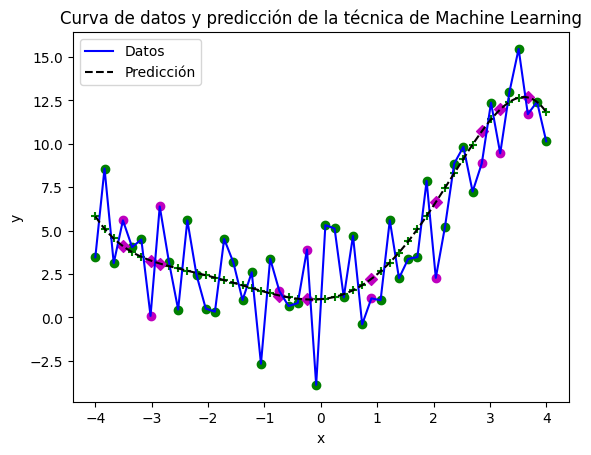

In [92]:
# Valores de salida del regresor para los valores anteriores
y_sal_pol_equiespaciados = pipeline.predict(x_equiespaciados)

plt.plot(x, y, "b-", label="Datos")
plt.plot(x_equiespaciados, y_sal_pol_equiespaciados, "k--", label="Predicción")
plt.scatter(x_ent, y_ent, color="g", marker='o')
plt.scatter(x_test, y_test, color="m", marker='o')
plt.scatter(x_ent, y_sal_pol_ent, color="g", marker='+')
plt.scatter(x_test, y_sal_pol_test, color="m", marker='D')

plt.title('Curva de datos y predicción de la técnica de Machine Learning')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Ejercicio 4: análisis del rendimiento del regresor lineal (polinomio de grado 1) y lineal de tipo polinómico de grado superior a 1.**

En clase de teoría se ha explicado el problema del subajuste y del sobreajuste. ¿Presenta alguno de estos problemas el regresor lineal? ¿Y el regresor polinómico? Para responder compare los errores del conjunto de entrenamiento y de test en cada caso. Recuerde la estimación de la varianza y sesgo de cada regresor.

**Ejercicio 5: análisis del error del regresor polinómico respecto a su grado**

En este ejercicio se va a visualizar el error cuadrático medio del regresor polinómico cuando se varía el grado del polinomio desde 1 hasta 45. El error se calculará para los conjuntos de dentrenamiento y de test y se mostrará en una gráfica. Escriba el código faltante y obtenga la gráfica. ¿Cuál es el grado óptimo del polinomio?

In [ ]:
grado_maximo_polinomio = 45
grado_polinomio = list(range(45+1))
grado_polinomio = grado_polinomio[1:] 

# Inicialización 
MSE_vector_ent = [0] * len(grado_polinomio)
MSE_vector_test = [0] * len(grado_polinomio)


indice = 0
for grado in grado_polinomio:

    # Instanciamos la clase que eleva a la potencia deseada
    # ESCRIBA EL CÓDIGO AQUÍ

    # No es necesario instanciar el aproximador lineal para el Pipeline 
    # debido a que ha sido instanciado anteriormente    

    # Generamos el pipeline: aplicará los procedimientos en el orden que indiquemos
    # Como nombre de las operaciones se puede emplear el que se desee: 'elevar_a_potencias' y 'regresor_lineal'
    # ESCRIBA EL CÓDIGO AQUÍ

    # Estimación de los parámetros del modelo regresor
    # ESCRIBA EL CÓDIGO AQUÍ

    # Salida del regresor polinómico para el conjunto de entrenamiento y de test
    # ESCRIBA EL CÓDIGO AQUÍ

    MSE_vector_ent[grado-1] = mean_squared_error(y_ent, y_sal_pol_ent_bucle)
    MSE_vector_test[grado-1] = mean_squared_error(y_test, y_sal_pol_test_bucle)
    #indice = indice + 1

plt.figure(figsize=(9, 9))
plt.plot(grado_polinomio, MSE_vector_ent, "g-", label="Error de entrenamiento")
plt.plot(grado_polinomio, MSE_vector_test, "m-", label="Error de test")
plt.yscale('log')
plt.xticks(grado_polinomio)
plt.xlabel('Grado del polinomio')
plt.ylabel('Error MSE')
plt.legend()


NameError: name 'y_sal_pol_ent_bucle' is not defined